In [1]:
# téléchargement

from pymatgen.ext.matproj import MPRester
import pymatgen.electronic_structure.core as elstruct
from pymatgen.electronic_structure import plotter
from matplotlib import pyplot as plt
import numpy as np

cle_materiau = "mp-20072"
cle_utilisateur = "om6hvHlirPcyuxXF"

with MPRester(cle_utilisateur) as m:
    band = m.get_bandstructure_by_material_id(cle_materiau)
    plot = plotter.BSPlotter(band)

In [2]:
# on récupère la bande interdite et on imprime ses attributs
band_gap = band.get_band_gap()
print('La bande interdite est directe ?     : '+str(band_gap['direct']))
print('L\'énergie de la bande interdite est  : '+str(round(band_gap['energy'],4))+' [eV]')
print('transition de la bande interdite     : '+band_gap['transition']+'\n')

La bande interdite est directe ?     : False
L'énergie de la bande interdite est  : 2.5162 [eV]
transition de la bande interdite     : Z-L



In [3]:
# on prépare les données pour la suite des calculs

# on recupere et prépare les donnees pour les premieres et dernieres bandes de conduction et valence
cv_bands = [band.get_vbm(), band.get_cbm()]
names = ['dernière bande de valence', 'première bande de conduction']
names_to_get_the_data = ['cbm', 'vbm']
colors = ['r','g']

list = zip(cv_bands, names, names_to_get_the_data, colors)

# petit helper pour calculer la pente entre 2 points
pente = lambda x,y : (y[-1]-y[0])/(x[-1]-x[0])

# on cree la clé utile à recuperer les bandes de frequence
cle = elstruct.Spin(1)

# on récupère les axes x et y selon lesquels sont plottées les bandes et d'autres données utiles au plot 
donnees_plot = plot.bs_plot_data()
x = donnees_plot.get('distances')
y = donnees_plot.get('energy')
ticks = donnees_plot.get('ticks').get('distance')
nb_ticks = len(x)


bande(s) correspondant à la dernière bande de valence : 
18 19 
énergie  : 4.0339 eV

bande(s) correspondant à la première bande de conduction : 
20 
énergie  : 6.5501 eV


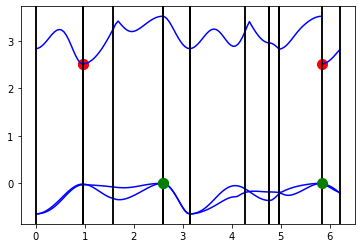

In [4]:
# on imprime les données pour chaque bande avec également un joli plot
for info_bm,name,cvbm,color in list:
    
    index_bandes = info_bm['band_index'][cle]
    print('\nbande(s) correspondant à la '+name+' : ')
    
    # il faut maintenant chercher les max et min de dispersion pour chaque bande : 
    # les pentes max et min pour les bandes concernées
    pente_bande = np.zeros((len(index_bandes),nb_ticks))
    k = 0
    for index in index_bandes:
        print(index, end=' ')
        for i in range(nb_ticks):
            yi = y[i].get('1')[index]
            xi = x[i]
            pente_bande[k][i] = pente(xi, yi)
            plt.plot(xi, yi,'b')
        k += 1
    
    print('\nénergie  : '+str(info_bm['energy'])+' eV')
    
    
    for xi in ticks:
        plt.axvline(xi,0,color="black")
    
    bande = donnees_plot.get(cvbm)
    for i in range(len(bande)):
        (xi,yi) = bande[i]
        plt.plot(xi,yi,'o'+color,markersize=10)
        
plt.show()